## Crossmatching GAIA Observation to Anything!

In [4]:
from astroquery.gaia import Gaia
from astroquery.mast import Observations
from astroquery.vizier import Vizier
from astropy.coordinates import SkyCoord
import astropy.units as u

# Step 1: Get Coordinates from GAIA DR3
gaia_id = '1328057763997734144'

# Query GAIA DR3 for the source ID
job = Gaia.launch_job(f"SELECT * FROM gaiadr3.gaia_source WHERE source_id = {gaia_id}")
gaia_results = job.get_results()
if len(gaia_results) == 0:
    raise ValueError("GAIA source ID not found.")

ra = gaia_results['ra'][0]
dec = gaia_results['dec'][0]

print(ra, dec)

# Create SkyCoord object
coords = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame='icrs')

# Step 2: Cross-match with Kepler and TESS catalogs, and other surveys
# 2a. Search in Kepler catalog
kepler_obs = Observations.query_criteria(coordinates=coords, radius=0.0001*u.deg, project='Kepler')

# 2b. Search in TESS catalog
tess_obs = Observations.query_criteria(coordinates=coords, radius=0.0001*u.deg, project='TESS')

# 2c. Search in Vizier for other photometric surveys
vizier = Vizier(columns=['*'])
vizier_results = vizier.query_region(coords, radius=0.0001*u.deg)

# Print results
print("GAIA Coordinates (RA, Dec):", ra, dec)
print("\nKepler Results:")
print(kepler_obs)

print("\nTESS Results:")
print(tess_obs)

print("\nOther Photometric Surveys Results (Vizier):")
for result in vizier_results:
    print(result)

250.39026093296025 36.435483228216945


GAIA Coordinates (RA, Dec): 250.39026093296025 36.435483228216945

Kepler Results:
intentType obs_collection provenance_name ... objID objID1 distance
---------- -------------- --------------- ... ----- ------ --------

TESS Results:
intentType obs_collection provenance_name ...   objID     objID1  distance
---------- -------------- --------------- ... --------- --------- --------
   science           TESS            SPOC ...  70441395  70441395      0.0
   science           TESS            SPOC ...  70905493  70905493      0.0
   science           TESS            SPOC ... 164566184 164566184      0.0
   science           TESS            SPOC ... 168452464 168452464      0.0
   science           HLSP             QLP ...  77570275  77570275      0.0
   science           HLSP             QLP ...  78367802  78367802      0.0
   science           HLSP            TICA ... 188331148 188331148      0.0
   science           HLSP            TICA ... 188528248 188528248      0.0
   science      

## IRSA lightcurve

In [85]:
!pip install ztfquery

DEPRECATION: Loading egg at /home/dutta/anaconda3/lib/python3.11/site-packages/pywwt-0.24.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/dutta/anaconda3/lib/python3.11/site-packages/daschlab-0.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/dutta/anaconda3/lib/python3.11/site-packages/pytz-2024.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.8/256.8 kB 6.5 MB/s eta 0:00:00m eta 0:00:01


In [147]:
from ztfquery import lightcurve
import matplotlib.pyplot as plt

# Replace this with your GAIA ID
gaia_id = '1328057763997734144'

# Note: You may need to convert the GAIA ID to coordinates or another identifier recognized by ZTF.

# Fetch lightcurve data from ZTF
# Assuming you have the coordinates of the star (RA, Dec) from GAIA data
ra = 250.39026
dec = 36.43548

# Query ZTF
radius_arcsec = 1  # search radius in arcseconds
lc_query = lightcurve.LCQuery.from_position(ra, dec, radius_arcsec, bandname="g")
lc_data = lc_query.data

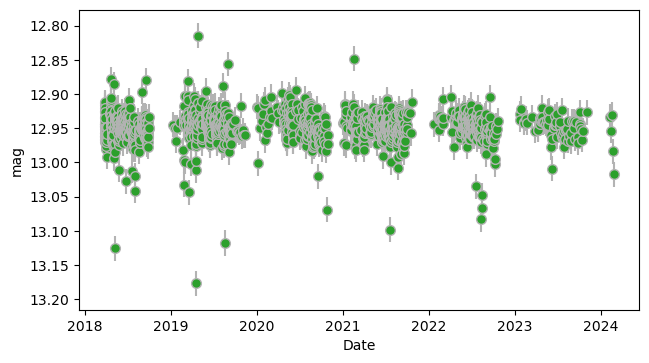

In [148]:
lc_query.show()

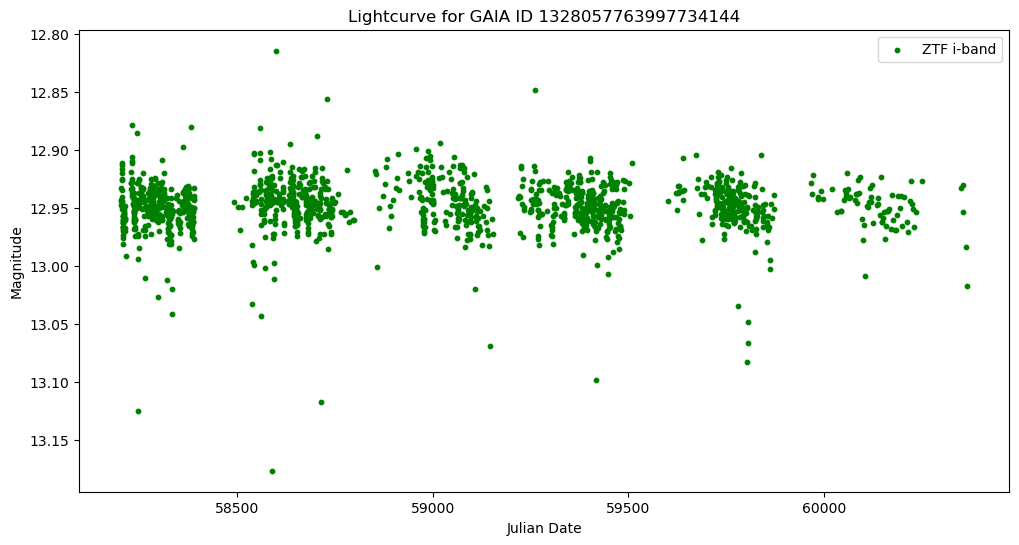

In [149]:
# Check if data is available
if not lc_data.empty:
    # Extract time (in JD) and magnitude from the data
    time = lc_data['mjd']
    magnitude = lc_data['mag']
    
    # Plot the lightcurve
    plt.figure(figsize=(12, 6))
    plt.scatter(time, magnitude, s=10, color='green', label='ZTF i-band')
    plt.xlabel('Julian Date')
    plt.ylabel('Magnitude')
    plt.title(f'Lightcurve for GAIA ID {gaia_id}')
    plt.gca().invert_yaxis()  # Magnitude scale is inverted
    plt.legend()
    plt.show()
else:
    print(f"No lightcurve data found for GAIA ID {gaia_id} in ZTF.")

In [150]:
lc_data.columns

Index(['oid', 'expid', 'hjd', 'mjd', 'mag', 'magerr', 'catflags', 'filtercode',
       'ra', 'dec', 'chi', 'sharp', 'filefracday', 'field', 'ccdid', 'qid',
       'limitmag', 'magzp', 'magzprms', 'clrcoeff', 'clrcounc', 'exptime',
       'airmass', 'programid'],
      dtype='object')

In [151]:
(time.max() - time.min())/365.3

5.9184015737749816

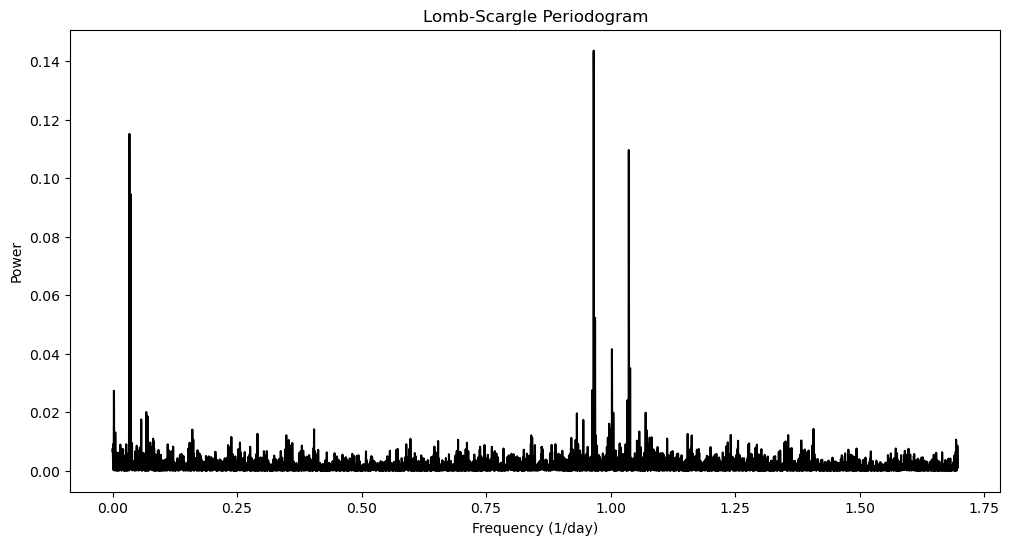

Best period: 1.0350898141906453 days


In [152]:
# Calculate the periodogram
frequency, power = LombScargle(time, magnitude).autopower()

# Plot the periodogram
plt.figure(figsize=(12, 6))
plt.plot(frequency, power, 'k-')
plt.xlabel('Frequency (1/day)')
plt.ylabel('Power')
plt.title('Lomb-Scargle Periodogram')
plt.show()

# Optionally, identify the best period
best_frequency = frequency[np.argmax(power)]
best_period = 1 / best_frequency
print(f'Best period: {best_period} days')

In [35]:
from astroquery.gaia import Gaia

# Replace with your actual GAIA ID
gaia_id = '1328057763997734144'  # Example GAIA ID

# Query GAIA database for the star's variable flag
gaia_query = f"""
SELECT
    source_id,
    phot_variable_flag
FROM gaiadr3.gaia_source
WHERE source_id = {gaia_id}
"""

# Execute the query
job = Gaia.launch_job(gaia_query)
results = job.get_results()

# Check the phot_variable_flag
if len(results) > 0:
    phot_variable_flag = results['phot_variable_flag'][0]
    print(f"GAIA ID: {gaia_id}")
    print(f"Photometric Variable Flag: {phot_variable_flag}")
    
    # Interpret the flag
    if phot_variable_flag == 'VARIABLE':
        print("The star is classified as variable by GAIA.")
    elif phot_variable_flag == 'NOT_AVAILABLE':
        print("The variability information is not available for this star.")
    else:
        print("The star is not classified as variable by GAIA.")
else:
    print(f"No data found for GAIA ID {gaia_id}.")

GAIA ID: 1328057763997734144
Photometric Variable Flag: NOT_AVAILABLE
The variability information is not available for this star.


In [76]:
from astroquery.gaia import Gaia

# Replace with your actual GAIA ID
gaia_id = '1328057763997734144'  # Example GAIA ID

# Query GAIA database for the star's non_single_star flag
gaia_query = f"""
SELECT
    source_id,
    non_single_star
FROM gaiadr3.gaia_source
WHERE source_id = {gaia_id}
"""

# Execute the query
job = Gaia.launch_job(gaia_query)
results = job.get_results()

# Check the non_single_star flag
if len(results) > 0:
    non_single_star = results['non_single_star'][0]
    print(f"GAIA ID: {gaia_id}")
    print(f"Non-Single Star Flag: {non_single_star}")
    
    # Interpret the flag
    if non_single_star == 1:
        print("The star is classified as non-single (part of a multiple star system) by GAIA.")
    elif non_single_star == 0:
        print("The star is classified as single by GAIA.")
    else:
        print("The non-single star classification is not available for this star.")
else:
    print(f"No data found for GAIA ID {gaia_id}.")

GAIA ID: 1328057763997734144
Non-Single Star Flag: 0
The star is classified as single by GAIA.


In [34]:
from astroquery.gaia import Gaia
from astroquery.mast import Catalogs
from astropy.coordinates import SkyCoord
import astropy.units as u

def gaia_to_tess(gaia_id, max_position_offset=0.1, max_magnitude_diff=0.3):
    # Step 1: Get Coordinates and Magnitude from GAIA DR3
    job = Gaia.launch_job(f"SELECT ra, dec, phot_g_mean_mag FROM gaiadr3.gaia_source WHERE source_id = {gaia_id}")
    gaia_results = job.get_results()
    if len(gaia_results) == 0:
        raise ValueError("GAIA source ID not found.")
    
    ra = gaia_results['ra'][0]
    dec = gaia_results['dec'][0]
    gaia_mag = gaia_results['phot_g_mean_mag'][0]
    
    # Create SkyCoord object
    coords = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame='icrs')
    
    # Step 2: Cross-match with TESS catalog
    tess_catalog = Catalogs.query_criteria(coordinates=coords, radius=0.001*u.deg, catalog='TIC', objType='STAR')
    
    # Check if we have results
    if len(tess_catalog) == 0:
        raise ValueError("No matching TESS ID found.")
    
    # Verify the closest match
    best_match = None
    for tess_entry in tess_catalog:
        tess_id = tess_entry['ID']
        tess_ra = tess_entry['ra']
        tess_dec = tess_entry['dec']
        tess_mag = tess_entry['Tmag']
        
        tess_coords = SkyCoord(ra=tess_ra*u.degree, dec=tess_dec*u.degree, frame='icrs')
        position_offset = coords.separation(tess_coords).arcsecond
        print(position_offset)
        
        magnitude_diff = abs(gaia_mag - tess_mag)
        
        if position_offset <= max_position_offset and magnitude_diff <= max_magnitude_diff:
            best_match = tess_id
            break
    
    if best_match is None:
        raise ValueError("No matching TESS ID found within the specified limits.")
    
    return best_match

# Example usage
gaia_id = '1328057763997734144'
try:
    tess_id = gaia_to_tess(gaia_id)
    print(f"GAIA ID {gaia_id} corresponds to TESS ID {tess_id}")
except ValueError as e:
    print(e)

0.05987425856584649
GAIA ID 1328057763997734144 corresponds to TESS ID 57158280


In [41]:
from astroquery.gaia import Gaia
import json

# Load the final JSON file
with open('color_natmag_cross11.json', 'r') as f:
    final_data = json.load(f)

# Open a text file to write B and V magnitudes with errors
with open('GAIA_std.txt', 'w') as f:
    # Write header
    f.write("GAIA_ID\tBmag\tRmag\tGmag\tbp_rp\tepoch\tparallax\tazero_gspphot\tag_gspphot\tebpminrp_gspphot\n")

    for gaia_id, plates_data in final_data.items():
        # Get the GAIA ID
        gaia_id_str = str(gaia_id)

        # Query GAIA for the required magnitudes and other information
        query = f"""
        SELECT 
            source_id, 
            parallax,
            ref_epoch,
            phot_g_mean_mag,
            phot_rp_mean_mag, 
            phot_bp_mean_mag,
            bp_rp, 
            ag_gspphot,
            azero_gspphot,
            ebpminrp_gspphot
        FROM gaiadr3.gaia_source 
        WHERE source_id = {gaia_id_str}
        AND phot_variable_flag = 'NOT_AVAILABLE';
        """
        job = Gaia.launch_job(query)
        result = job.get_results()

        if len(result) > 0:
            # Extract the values
            Bmag = result['phot_bp_mean_mag'][0]
            Gmag = result['phot_g_mean_mag'][0]
            Rmag = result['phot_rp_mean_mag'][0]
            Bp_Rp = result['bp_rp'][0]
            epoch = result['ref_epoch'][0]
            parallax = result['parallax'][0]
            ag_gspphot = result['ag_gspphot'][0]
            azero_gspphot = result['azero_gspphot'][0]
            ebpminrp_gspphot = result['ebpminrp_gspphot'][0]

            # Write to file
            f.write(f"{gaia_id_str}\t{Bmag:.3f}\t{Rmag:.3f}\t{Gmag:.3f}\t{Bp_Rp:.3f}\t{epoch}\t{parallax:.3f}\t{azero_gspphot:.3f}\t{ag_gspphot:.3f}\t{ebpminrp_gspphot:.3f}\n")
        else:
            # Skip writing if no data is found or if the star is not flagged as constant
            continue

print("B and V magnitudes saved to GAIA_std.txt")

/tmp/ipykernel_1009075/2516996860.py:50: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  f.write(f"{gaia_id_str}\t{Bmag:.3f}\t{Rmag:.3f}\t{Gmag:.3f}\t{Bp_Rp:.3f}\t{epoch}\t{parallax:.3f}\t{azero_gspphot:.3f}\t{ag_gspphot:.3f}\t{ebpminrp_gspphot:.3f}\n")


B and V magnitudes saved to GAIA_std.txt


## TESS Lightcurve

In [1]:
!pip install lightkurve

DEPRECATION: Loading egg at /home/dutta/anaconda3/lib/python3.11/site-packages/pywwt-0.24.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/dutta/anaconda3/lib/python3.11/site-packages/daschlab-0.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/dutta/anaconda3/lib/python3.11/site-packages/pytz-2024.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [55]:
import lightkurve as lk
from lightkurve.correctors import CBVCorrector
from lightkurve.correctors import PLDCorrector
from lightkurve.correctors import RegressionCorrector
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import astropy.units as u
import sys
from sklearn.preprocessing import normalize

In [74]:
TIC = 'TIC 57158280'

In [75]:
# import pandas as pd
# pd.set_option('display.max_columns', None)
lk.search_lightcurve(TIC, mission="TESS")

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 24,2020,QLP,1800,57158280,0.0
1,TESS Sector 25,2020,QLP,1800,57158280,0.0
2,TESS Sector 51,2022,QLP,600,57158280,0.0
3,TESS Sector 52,2022,QLP,600,57158280,0.0


In [44]:
lc_collection = lk.search_lightcurve(TIC, author='QLP', exptime=1800, mission="TESS", sector=[24, 25, 51, 52]).download_all()

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

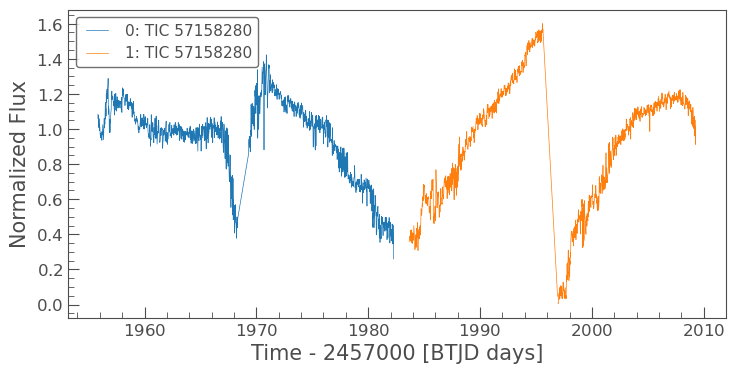

In [45]:
lc_collection.plot()

In [46]:
search_result = lk.search_tesscut(TIC, sector=[24, 25])

In [47]:
tpf = search_result.download()

/home/dutta/anaconda3/lib/python3.11/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


<Axes: title={'center': 'Target ID: TIC 57158280, Cadence: 0'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

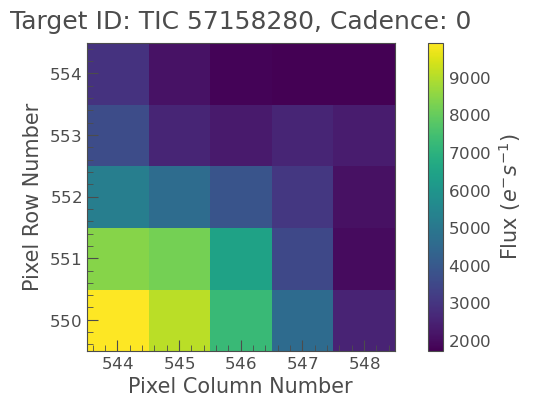

In [48]:
tpf.plot()

In [49]:
tpf.create_threshold_mask(threshold=0.25)

array([[ True,  True,  True,  True, False],
       [ True,  True,  True,  True, False],
       [ True,  True,  True, False, False],
       [ True, False, False, False, False],
       [False, False, False, False, False]])

In [50]:
# Create a simple thresholded aperture mask
aper = tpf.create_threshold_mask(threshold=0.25)

<Axes: title={'center': 'Target ID: TIC 57158280, Cadence: 0'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

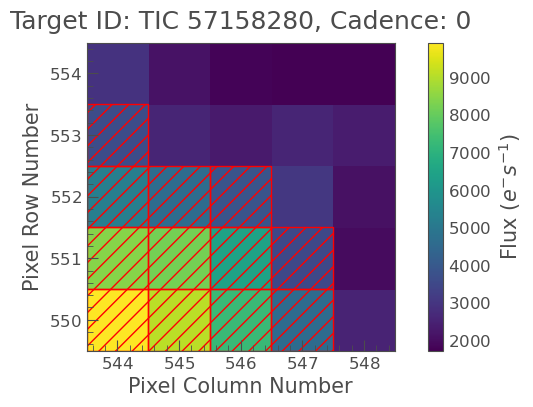

In [51]:
tpf.plot(aperture_mask = aper)

In [52]:
# Generate a simple aperture photometry light curve
raw_lc = tpf.to_lightcurve(aperture_mask=aper)

In [53]:
# # Create a design matrix using PCA components from the cutout background
dm = lk.DesignMatrix(tpf.flux[:, ~aper], name='pixel regressors').append_constant()

In [56]:
pld = PLDCorrector(tpf)

In [57]:
pld_lc = pld.correct()

In [58]:
# Generate the CBVCorrector object and interpolate the downloaded CBVs to the light curve cadence
cbvcorrector = lk.CBVCorrector(raw_lc, interpolate_cbvs=True, extrapolate_cbvs=True)

In [59]:
cbvcorrector.cbvs

[TESS CBVs, Sector.Camera.CCD : 25.1.2, CBVType : SingleScale, nCBVS : 16,
 TESS CBVs, Sector.Camera.CCD : 25.1.2, CBVType.Band: MultiScale.1, nCBVs : 8,
 TESS CBVs, Sector.Camera.CCD : 25.1.2, CBVType.Band: MultiScale.2, nCBVs : 8,
 TESS CBVs, Sector.Camera.CCD : 25.1.2, CBVType.Band: MultiScale.3, nCBVs : 8,
 TESS CBVs, Sector.Camera.CCD : 25.1.2, CBVType : Spike, nCBVS : 1]

<Axes: title={'center': 'TESS CBVs (Sector.Camera.CCD : 25.1.2, CBVType : SingleScale)'}, xlabel='Time [btjd]'>

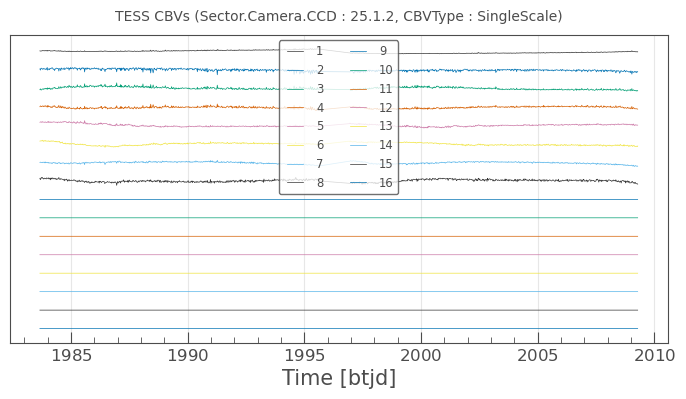

In [60]:
cbvcorrector.cbvs[0].plot()

Over-fitting metric: 0.07330772698991866
Under fitting metric: 0.9995739921262782
CDPP: 169.50096353050156 ppm


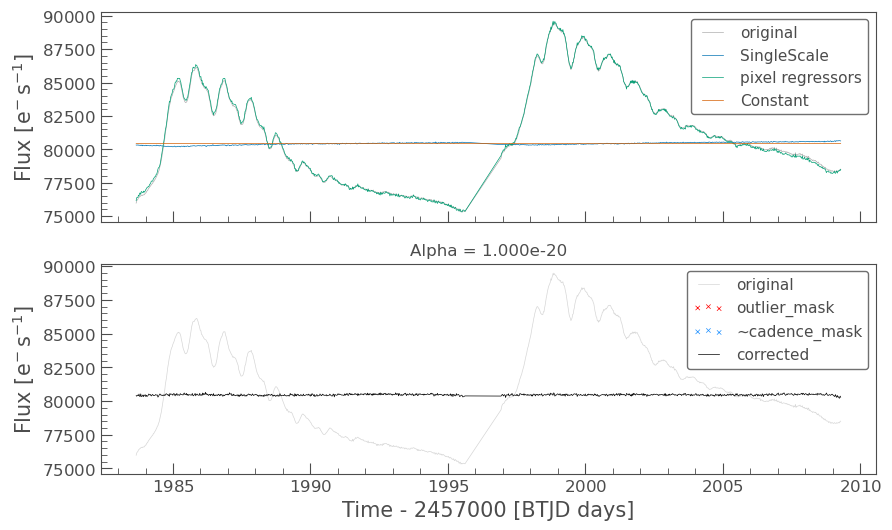

In [61]:
# Perform an unrestricted least-squares fit using only the pixel-derived design matrix.
cbvcorrector.correct_gaussian_prior(ext_dm=dm)
cbvcorrector.diagnose()
print('Over-fitting metric: {}'.format(cbvcorrector.over_fitting_metric()))
print('Under fitting metric: {}'.format(cbvcorrector.under_fitting_metric()))
print('CDPP: {}'.format(cbvcorrector.corrected_lc.estimate_cdpp()))
corrected_lc_just_pixel_dm = cbvcorrector.corrected_lc

In [62]:
print(dm.df.shape)
print(len(raw_lc.flux))

(1167, 14)
1167


Over fitting metric: 5.2534264911845633e-14
Under fitting metric: 0.9983034119381412
CDPP: 3396.9489325095033 ppm


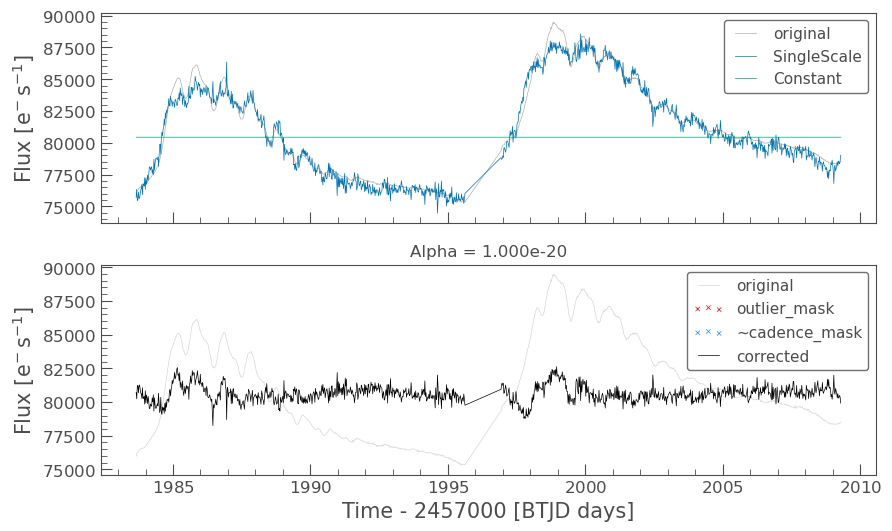

In [63]:
cbv_type = ['MultiScale.1', 'MultiScale.2', 'MultiScale.3', 'Spike']
cbv_indices = [np.arange(1,9), np.arange(1,9), np.arange(1,9), 'ALL']
cbvcorrector.correct_gaussian_prior() # cbv_type=cbv_type, cbv_indices=cbv_indices, ext_dm=dm, alpha=1e-4
cbvcorrector.diagnose()
print('Over fitting metric: {}'.format(cbvcorrector.over_fitting_metric()))
print('Under fitting metric: {}'.format(cbvcorrector.under_fitting_metric()))
print('CDPP: {}'.format(cbvcorrector.corrected_lc.estimate_cdpp()))
corrected_lc_joint_fit = cbvcorrector.corrected_lc

Optimized Over-fitting metric: 6.863008995522118e-05
Optimized Under-fitting metric: 0.9976483717954648
Optimized Alpha: 6.580e-04
CDPP: 3411.3380374436474 ppm


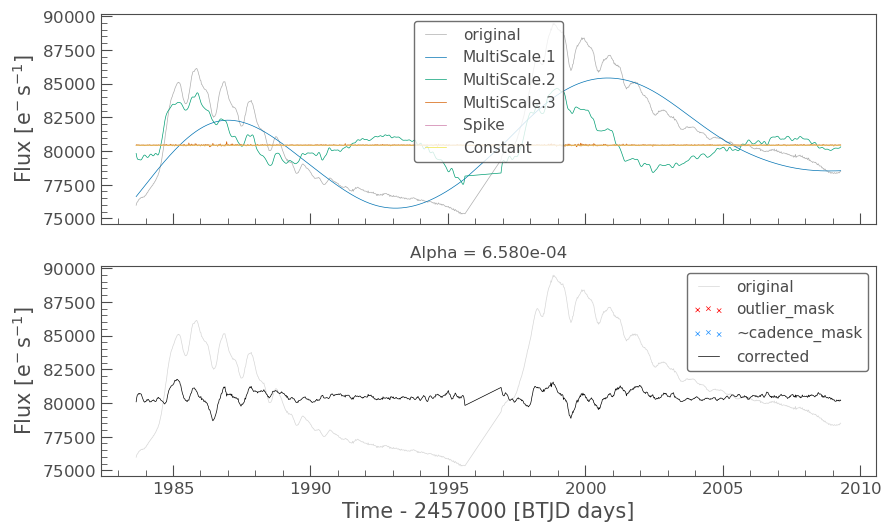

In [64]:
# Optimize the fit but ignore the under-fitting metric and set bounds on the alpha parameter.
cbvcorrector.correct(cbv_type=cbv_type, cbv_indices=cbv_indices, alpha_bounds=[1e-6, 1e-2], target_over_score=0.9, target_under_score=0.5)
cbvcorrector.diagnose()
print('CDPP: {}'.format(cbvcorrector.corrected_lc.estimate_cdpp()))

Text(0.5, 1.0, 'Comparison Between original and final corrected lightcurve')

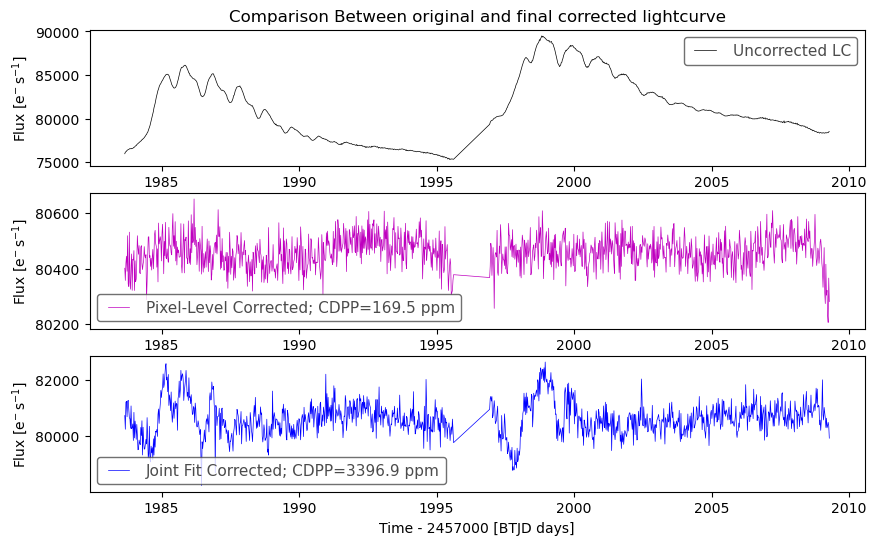

In [65]:
_, ax = plt.subplots(3, figsize=(10, 6))
cbvcorrector.lc.plot(ax=ax[0], normalize=False, label='Uncorrected LC', c='k')
corrected_lc_just_pixel_dm.plot(normalize=False, label='Pixel-Level Corrected; CDPP={0:.1f}'.format(corrected_lc_just_pixel_dm.estimate_cdpp()), ax=ax[1], c='m')
corrected_lc_joint_fit.plot(normalize=False, label='Joint Fit Corrected; CDPP={0:.1f}'.format(corrected_lc_joint_fit.estimate_cdpp()), ax=ax[2], c='b')
ax[0].set_title('Comparison Between original and final corrected lightcurve')

In [66]:
pg = corrected_lc_joint_fit.to_periodogram(oversample_factor=1)

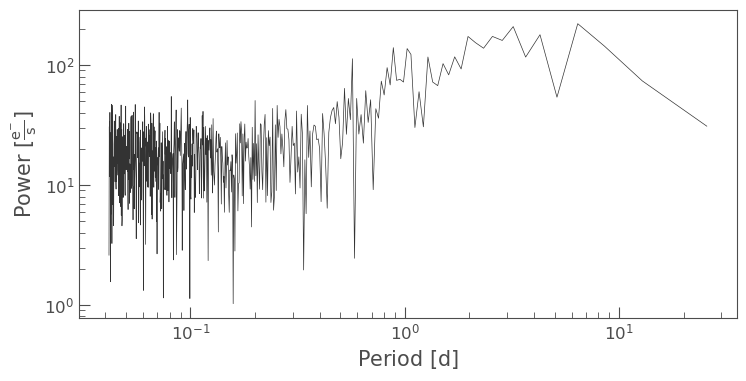

In [70]:
pg.plot(view='period', scale='log');

In [67]:
pg.period

<Quantity [25.62469482, 12.81234741,  8.54156494,  6.40617371,  5.12493896,
            4.27078247,  3.66067069,  3.20308685,  2.84718831,  2.56246948,
            2.32951771,  2.13539124,  1.97113037,  1.83033534,  1.70831299,
            1.60154343,  1.50733499,  1.42359416,  1.34866815,  1.28123474,
            1.22022356,  1.16475886,  1.11411717,  1.06769562,  1.02498779,
            0.98556519,  0.94906277,  0.91516767,  0.88361017,  0.85415649,
            0.82660306,  0.80077171,  0.7765059 ,  0.75366749,  0.73213414,
            0.71179708,  0.69255932,  0.67433407,  0.65704346,  0.64061737,
            0.62499256,  0.61011178,  0.59592314,  0.58237943,  0.56943766,
            0.55705858,  0.54520627,  0.53384781,  0.52295296,  0.5124939 ,
            0.502445  ,  0.49278259,  0.48348481,  0.47453139,  0.46590354,
            0.45758384,  0.44955605,  0.44180508,  0.43431686,  0.42707825,
            0.42007696,  0.41330153,  0.40674119,  0.40038586,  0.39422607,
            

In [68]:
pg.power

<Quantity [ 30.90365009,  73.74052694, 143.50273954, 221.10839376,
            53.90417633, 178.89094437, 116.47882666, 209.11438647,
           160.25934488, 173.12378399, 138.02312006, 153.61700604,
           172.98387055,  92.69341792, 116.97874953,  82.77678952,
           102.68555316,  67.29744772,  72.09739391, 116.70363946,
            30.49507736,  59.93406092,  30.07690238, 122.59094549,
           137.11825081,  72.09561859,  75.96596725,  74.46549493,
           139.63930433,  68.16086855,  95.13662915,  56.24733805,
            73.37852852,  35.97926602,  43.21496192,   9.12955278,
            51.32815767,  33.19376803,  61.07016976,  22.30810614,
            38.60399464,  26.53959761,  52.62812462,   2.44394194,
           112.82896071,  35.02072412,  52.5751272 ,  26.44112731,
            63.89780658,  22.72449031,  16.53945212,  36.61235216,
            49.55780995,  32.34699869,  44.24469169,  41.76447399,
            36.39518042,  27.41641205,   6.39749424,  14.65780

In [69]:
pg.period_at_max_power

<Quantity 6.40617371 d>